In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Change directory to Google Drive
HOME = os.chdir('/content/drive/MyDrive')

# Confirm the current directory
print("Current Directory:", os.getcwd())


Current Directory: /content/drive/MyDrive


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [4]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="koGc8rAjBDoq9Gs8FrwY")
project = rf.workspace("group-1-6vfvd").project("project_212-keall")
version = project.version(4)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to project_212-4 in yolov9:: 100%|██████████| 3458/3458 [00:01<00:00, 2926.90it/s]


In [5]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 27.0 MB/s eta 0:00:00


In [ ]:


from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="koGc8rAjBDoq9Gs8FrwY")

# Load the project
project = rf.workspace("group-1-6vfvd").project("project_212-keall")

# Get the version of the dataset
version = project.version(4)

# Download the dataset in YOLOv8 format
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

# Load the YOLOv9 model with weights from the last checkpoint
model = YOLO('/content/drive/MyDrive/yolov9c.pt')

# Start a new training session from epoch 101 to 200
results = model.train(
    data="/content/drive/MyDrive/project_212-4/data.yaml",
    epochs=100,               # Train for another 100 epochs (101-200)
    imgsz=640,                # Keep the adjusted image size
    batch=3,                 # Keep the increased batch size
    lr0=0.005,                # Keep the adjusted learning rate
    weight_decay=0.0005,      # Keep the adjusted weight decay
    optimizer='Adam',         # Keep the Adam optimizer
    patience=15,              # Keep the increased patience
)

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 39.3 MB/s eta 0:00:00


In [2]:

from ultralytics import YOLO
import numpy as np

# Load the trained model
model = YOLO("/content/drive/MyDrive/runs/train/yolov9c_experiment_optimized_v2/weights/best.pt")

# Evaluate the model on the validation set
results = model.val()

Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25,323,874 parameters, 0 gradients, 102.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 88.7MB/s]
val: Scanning /content/drive/MyDrive/project_212-4/valid/labels.cache... 146 images, 0 backgrounds, 0 corrupt: 100%|██████████| 146/146 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/project_212-4/valid/images/Clean_34_jpg.rf.6381fc4f722391431a6fb2900493d49b.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


                   all        146       1632      0.818      0.761      0.788      0.627
             Bird-drop         16        229      0.649      0.389      0.457      0.236
             Defective         71        218      0.886      0.771      0.807      0.754
                 Dusty         34        302      0.892      0.847      0.888      0.767
     Electrical-Damage         20         53      0.849      0.792      0.845      0.651
         Non-Defective         55        706      0.912      0.909      0.948       0.84
       Physical-Damage         46        124      0.721      0.856      0.785      0.516
Speed: 3.6ms preprocess, 31.6ms inference, 0.0ms loss, 12.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import shutil
from google.colab import files

# Define the path to the directory and the zip file
directory_path = '/content/drive/MyDrive/runs/train/yolov9c_experiment_optimized_v2'
zip_file_path = '/content/yolov9c_experiment_optimized_v2.zip'

# Zip the directory
shutil.make_archive('/content/yolov9c_experiment_optimized_v2', 'zip', directory_path)

# Download the zip file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

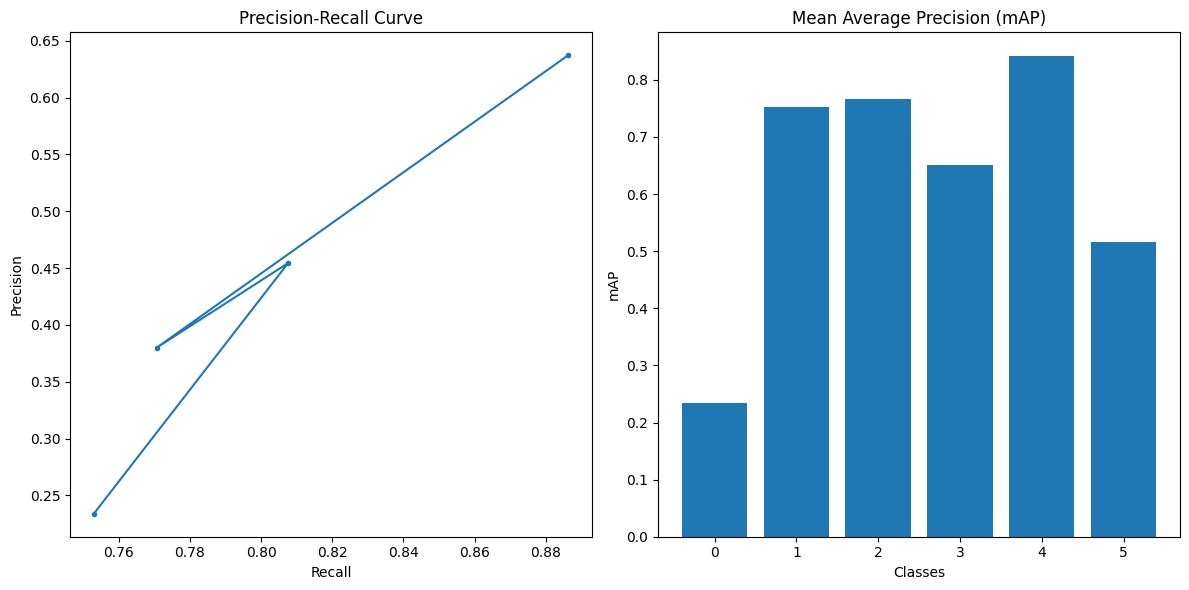

In [ ]:
import matplotlib.pyplot as plt

# Accessing metrics using methods if `results` is an object
# Check if results has the following methods or attributes
precision = results.class_result(0)  # Adjust if necessary
recall = results.class_result(1)     # Adjust if necessary

# Directly access the maps attribute if it's not callable
mAP = results.maps  # Access directly if it's an attribute

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
if precision is not None and recall is not None:
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
else:
    plt.text(0.5, 0.5, 'Precision and Recall data not available', horizontalalignment='center', verticalalignment='center')

# Mean Average Precision (mAP) Bar Plot
plt.subplot(1, 2, 2)
if mAP is not None and len(mAP) > 0:
    plt.bar(range(len(mAP)), mAP)
    plt.title('Mean Average Precision (mAP)')
    plt.xlabel('Classes')
    plt.ylabel('mAP')
else:
    plt.text(0.5, 0.5, 'mAP data not available', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()
